In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mnsit = pd.read_csv("mnist_train.csv")

In [3]:
mnsit.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x = mnsit.drop("label",axis=1)
y = mnsit["label"]
x.loc[1]

1x1      0
1x2      0
1x3      0
1x4      0
1x5      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Name: 1, Length: 784, dtype: int64

In [5]:
y[0]

5

In [6]:
x.loc[0].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [7]:
y[2]

4

In [8]:
np.where(y==8)

(array([   17,    31,    41, ..., 59989, 59995, 59999], dtype=int64),)

In [9]:
y[2]

4

In [10]:
np.where(y==4)

(array([    2,     9,    20, ..., 59943, 59951, 59975], dtype=int64),)

In [11]:
y[0:5]

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

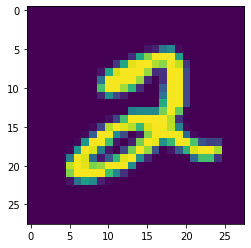

In [12]:
_ = x.loc[5]
images = _.values.reshape(28,28)
plt.imshow(images)

In [13]:
type(y[0])

numpy.int64

In [14]:
#train_test_split
x_train,x_test,y_train,y_test = x[:6000],x[6000:],y[:6000],y[6000:]

In [15]:
#prepare target datasets because it contain the numbers
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [16]:
y_test_5

6000     False
6001     False
6002     False
6003     False
6004      True
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: label, Length: 54000, dtype: bool

In [17]:
# training 
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=45)
sgd_clf.fit(x_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=45, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
clf = SGDClassifier(random_state=0,loss='modified_huber',penalty='l1',alpha=0.00001,
                    l1_ratio=0.15, fit_intercept=True,max_iter=2000,
                    tol=0.001,epsilon=0.0111,n_jobs=-2,
                    learning_rate='optimal',eta0=0.011,power_t=0.15,
                    early_stopping=False,validation_fraction=0.001,
                    n_iter_no_change=1, class_weight=None,warm_start=True)

skfold = StratifiedKFold(n_splits=10, random_state=None)
for train_index,test_index in skfold.split(x_train,y_train_5):
    clone_clf = clone(clf)
    x_train_fold = x_train.values[train_index]
    y_train_fold = y_train_5.values[train_index]
    x_test_fold = x_train.values[test_index]
    y_test_fold = y_train_5.values[test_index]
    
    clone_clf.fit(x_train_fold,y_train_fold)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred==y_test_fold)
    print("train_accuracy : {0:.4f}".format(n_correct/len(y_pred)))    

train_accuracy : 0.9533
train_accuracy : 0.9533
train_accuracy : 0.9700
train_accuracy : 0.9567
train_accuracy : 0.9517
train_accuracy : 0.9733
train_accuracy : 0.9683
train_accuracy : 0.9633
train_accuracy : 0.9617
train_accuracy : 0.9683


In [39]:
clf.

False

In [19]:
np.where(y==5)

(array([    0,    11,    35, ..., 59968, 59993, 59997], dtype=int64),)

In [20]:
y[7]

3

In [21]:
prd_it = x.loc[7]
y_pred = sgd_clf.predict([prd_it])
y_pred

array([False])

In [22]:
np.where(y==5)

(array([    0,    11,    35, ..., 59968, 59993, 59997], dtype=int64),)

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
accuracy = cross_val_score(sgd_clf,x_train,y_train_5,cv=5,scoring="accuracy")

In [25]:
accuracy

array([0.95666667, 0.97      , 0.96916667, 0.96      , 0.965     ])

In [26]:
from sklearn.model_selection import cross_val_predict

In [27]:
y_pred = cross_val_predict(clf,x_train,y_train_5,cv=3)
y_pred

array([False, False, False, ..., False, False, False])

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_train_5,y_pred)

array([[5409,   77],
       [ 127,  387]], dtype=int64)

In [30]:
from sklearn.metrics import precision_score,recall_score

In [31]:
precision_score(y_train_5,y_pred)

0.834051724137931

In [32]:
recall_score(y_train_5,y_pred)

0.7529182879377432

In [33]:
from sklearn.metrics import f1_score

In [34]:
f1_score(y_train_5,y_pred)

0.7914110429447853